# Data synthesis

As normative models learn an invertable mapping from feature space to deviation space, it is easy to synthesize data, all that it amounts to is to take gaussian samples in deviation space, and applying the inverse of the learned mapping. Besides this, the PCNtoolkit also accounts for class imbalance in the batch effects, and batch-effect-specific covariate ranges, to make the synthesized data correspond better to the original training data. 

First we need a fitted model, and here we load a model that was pre-trained on 5 features.

In [1]:
from pcntoolkit import NormativeModel
from pcntoolkit.util.plotter import plot_centiles_advanced
import logging
logger = logging.getLogger("pymc")
logger.setLevel(logging.ERROR)
model = NormativeModel.load("../out/pre_fitted_models/main_workflow_model")

In [2]:
# Do basic synthesization
data = model.synthesize(n_samples = 1000)

Process: 25407 - 2025-11-19 13:21:35 - Dataset "synthesized" created.
    - 1000 observations
    - 1000 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (25)
	sex (2)
    
Process: 25407 - 2025-11-19 13:21:35 - Synthesizing data for 5 response variables.
Process: 25407 - 2025-11-19 13:21:35 - Synthesizing data for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:21:37 - Synthesizing data for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:21:38 - Synthesizing data for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:21:38 - Synthesizing data for lh_G_and_S_transv_frontopol.
Process: 25407 - 2025-11-19 13:21:39 - Synthesizing data for lh_G_and_S_frontomargin.


Process: 25407 - 2025-11-19 13:21:39 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (1)
	sex (1)
    
Process: 25407 - 2025-11-19 13:21:39 - Computing centiles for 5 response variables.
Process: 25407 - 2025-11-19 13:21:39 - Computing centiles for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:21:41 - Computing centiles for lh_G_and_S_frontomargin.
Process: 25407 - 2025-11-19 13:21:43 - Computing centiles for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:21:45 - Computing centiles for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:21:46 - Computing centiles for lh_G_and_S_transv_frontopol.
Process: 25407 - 2025-11-19 13:21:49 - Harmonizing data on 5 response variables.
Process: 25407 - 2025-11-19 13:21:49 - Harmonizing data for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:21:50 - Harmonizing data for lh_G_and_S_frontomargin.
Process: 25407 

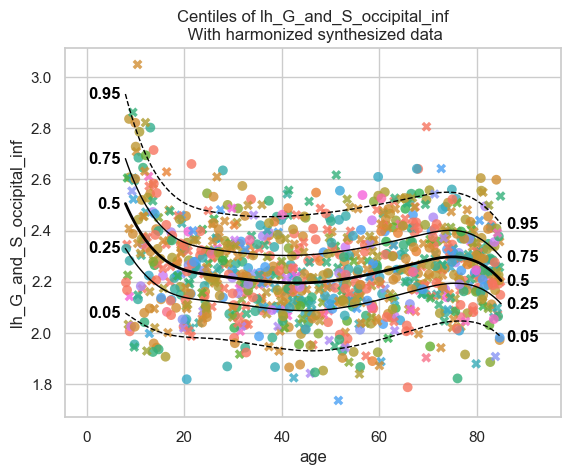

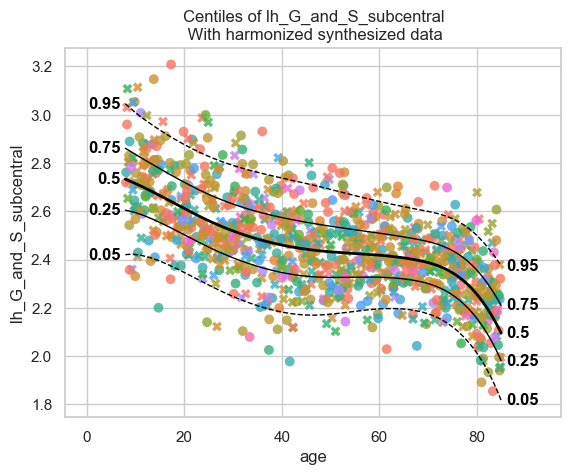

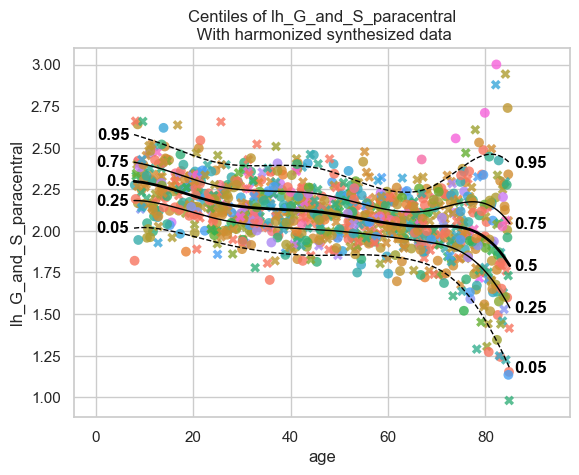

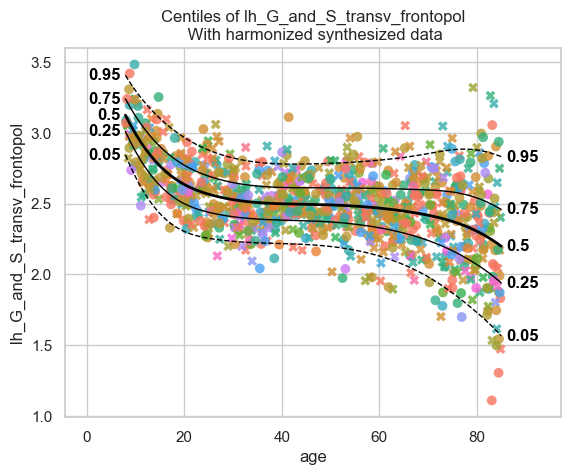

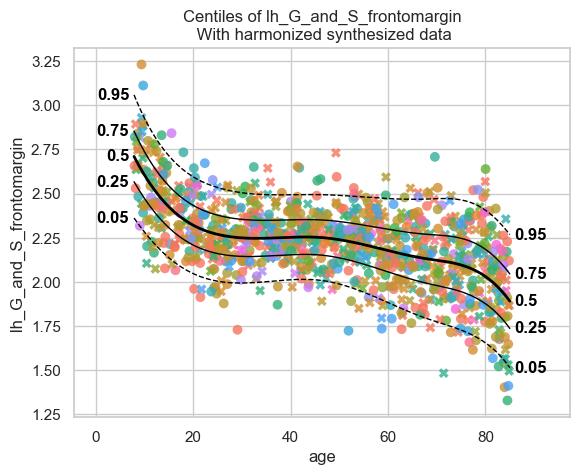

In [3]:
# Plot the data
batch_effects="all" # Show data from all batch effects, and color accordingly
show_legend=False   # Don't show the legend, as it is too big
plot_centiles_advanced(model=model,scatter_data=data, batch_effects=batch_effects,show_legend=show_legend)

We can see the synthesized data follows the centiles nicely, but the data from the different sites is also distributed uniformly accross the entire age range. To do this differently, we can set `covariate_range_per_batch_effect`, which does exactly what it says on the box; it computes the covariate range for each combination of batch effects.

In [4]:
# Do basic synthesization
data = model.synthesize(n_samples = 1000, covariate_range_per_batch_effect=True)

Process: 25407 - 2025-11-19 13:21:55 - Dataset "synthesized" created.
    - 1000 observations
    - 1000 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (25)
	sex (2)
    
Process: 25407 - 2025-11-19 13:21:55 - Synthesizing data for 5 response variables.
Process: 25407 - 2025-11-19 13:21:55 - Synthesizing data for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:21:56 - Synthesizing data for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:21:56 - Synthesizing data for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:21:57 - Synthesizing data for lh_G_and_S_transv_frontopol.
Process: 25407 - 2025-11-19 13:21:57 - Synthesizing data for lh_G_and_S_frontomargin.


Process: 25407 - 2025-11-19 13:21:58 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (1)
	sex (1)
    
Process: 25407 - 2025-11-19 13:21:58 - Computing centiles for 5 response variables.
Process: 25407 - 2025-11-19 13:21:58 - Computing centiles for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:21:59 - Computing centiles for lh_G_and_S_frontomargin.
Process: 25407 - 2025-11-19 13:22:01 - Computing centiles for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:22:02 - Computing centiles for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:22:04 - Computing centiles for lh_G_and_S_transv_frontopol.
Process: 25407 - 2025-11-19 13:22:05 - Harmonizing data on 5 response variables.
Process: 25407 - 2025-11-19 13:22:05 - Harmonizing data for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:22:06 - Harmonizing data for lh_G_and_S_frontomargin.
Process: 25407 

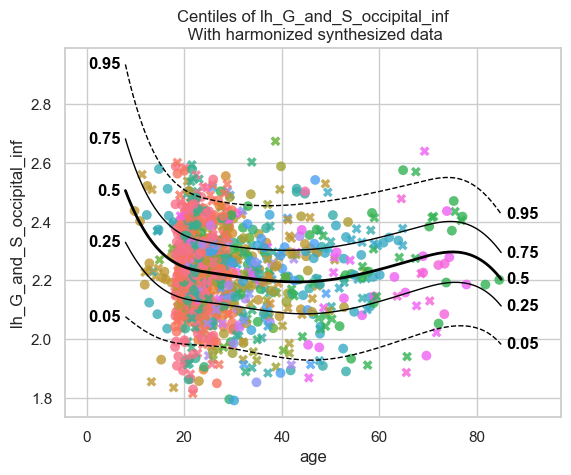

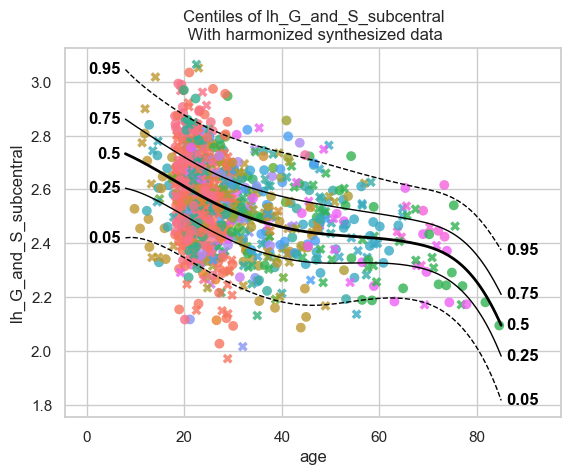

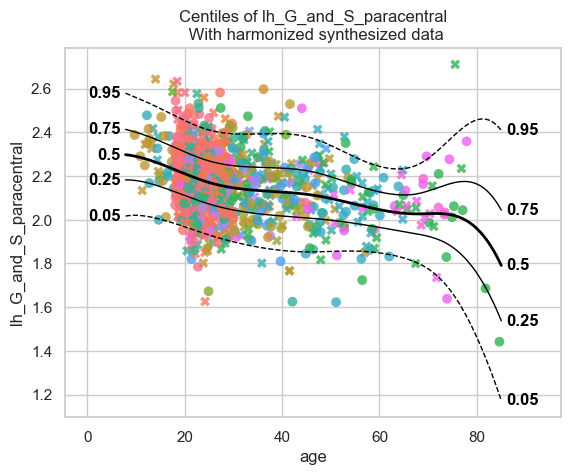

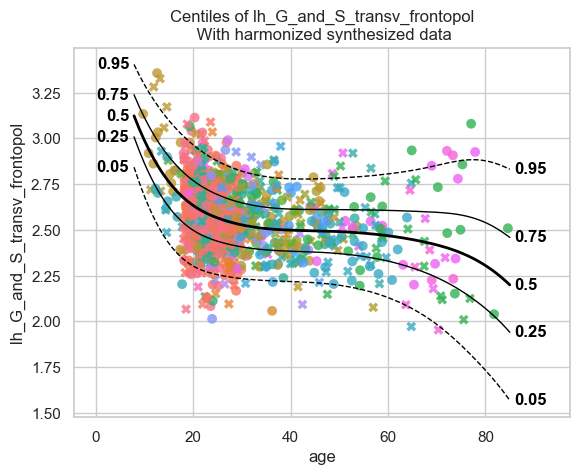

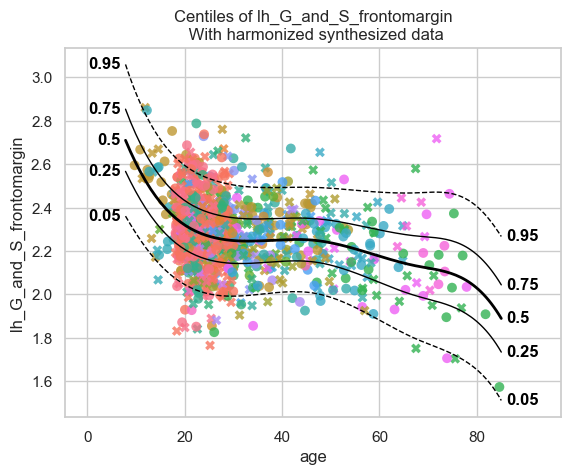

In [5]:
# Plot the data
batch_effects="all" # Show data from all batch effects, and color accordingly
show_legend=False   # Don't show the legend, as it is too big
plot_centiles_advanced(model=model, scatter_data=data, batch_effects=batch_effects,show_legend=show_legend)

If we set harmonize_data=False, the scatter data is not corrected for batch effects, which should give a good impression of the learned effects that are eliminated by the model.

Process: 25407 - 2025-11-19 13:22:11 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (1)
	sex (1)
    
Process: 25407 - 2025-11-19 13:22:11 - Computing centiles for 5 response variables.
Process: 25407 - 2025-11-19 13:22:11 - Computing centiles for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:22:13 - Computing centiles for lh_G_and_S_frontomargin.
Process: 25407 - 2025-11-19 13:22:14 - Computing centiles for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:22:15 - Computing centiles for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:22:17 - Computing centiles for lh_G_and_S_transv_frontopol.


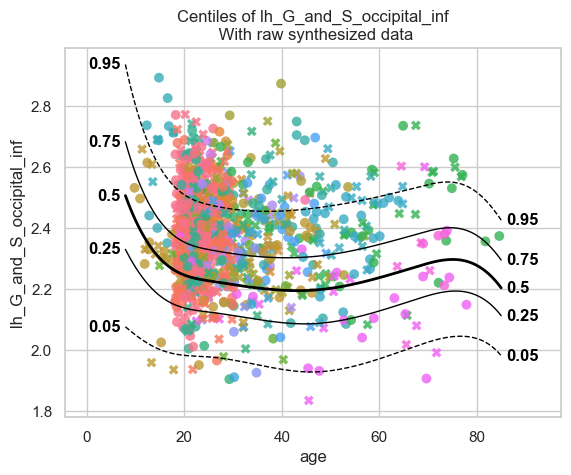

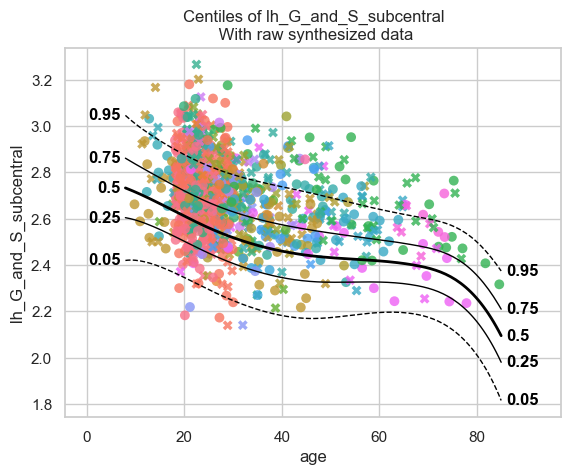

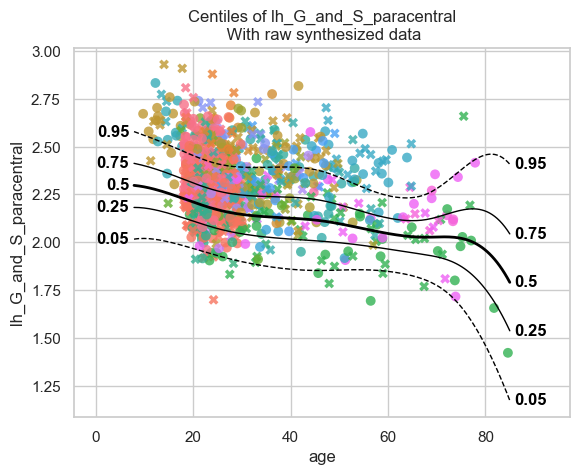

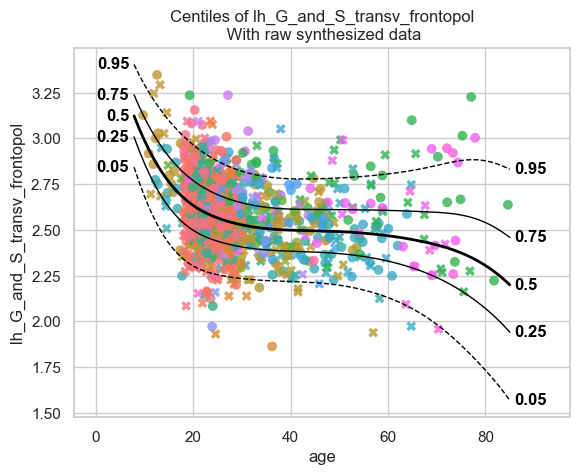

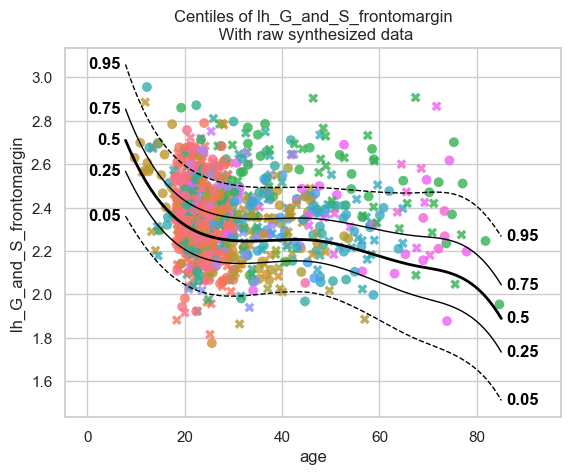

In [6]:
# Plot the data
batch_effects="all" # Show data from all batch effects, and color accordingly
show_legend=False   # Don't show the legend, as it is too big
harmonize_data=False 
plot_centiles_advanced(model=model, scatter_data=data, batch_effects=batch_effects,show_legend=show_legend, harmonize_data=False)

We see that the centiles do not seem to follow the data well. This is misleading, because this model actually learned many different centiles, one for each batch effect, and this is just one of them. The data that you see here still contains those effects that have been corrected for. The centiles that you see are selected automatically to be the ones corresponding to the batch effect that is first in alphabetical order. We can use another setting of the plotting method to show this more clearly. 

Process: 25407 - 2025-11-19 13:23:26 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 5 response variables
    - 2 batch effects:
    	site (1)
	sex (1)
    
Process: 25407 - 2025-11-19 13:23:26 - Computing centiles for 5 response variables.
Process: 25407 - 2025-11-19 13:23:26 - Computing centiles for lh_G_and_S_occipital_inf.
Process: 25407 - 2025-11-19 13:23:28 - Computing centiles for lh_G_and_S_frontomargin.
Process: 25407 - 2025-11-19 13:23:29 - Computing centiles for lh_G_and_S_subcentral.
Process: 25407 - 2025-11-19 13:23:31 - Computing centiles for lh_G_and_S_paracentral.
Process: 25407 - 2025-11-19 13:23:33 - Computing centiles for lh_G_and_S_transv_frontopol.


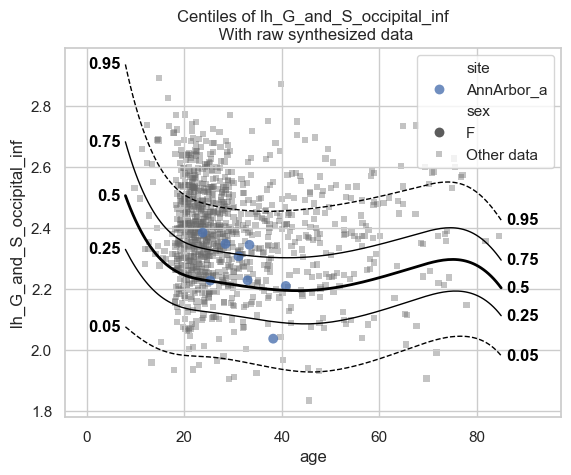

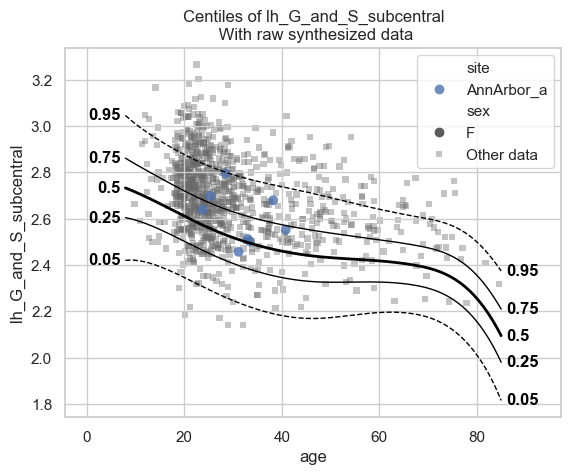

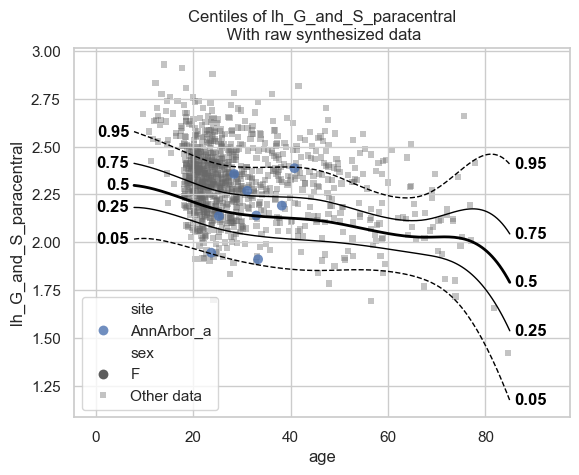

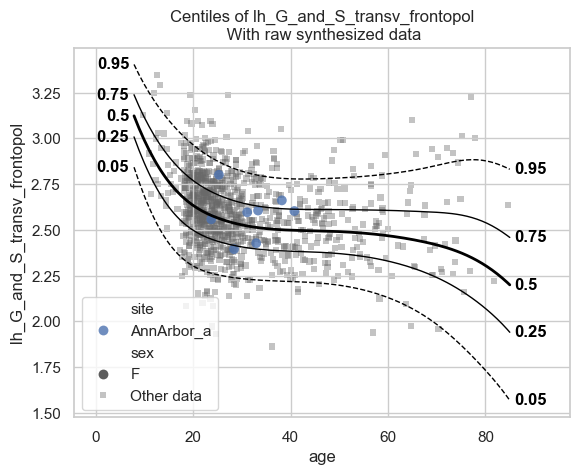

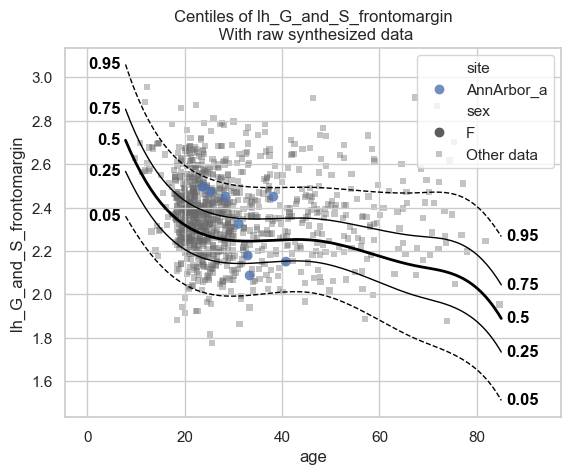

In [8]:
# Plot the data
batch_effects = None # Don't pass batch_effect; the model decides which data to plot the centiles for
show_other_data=True # Also scatter the data from other batches, but don't color
show_legend=True    # Show the legend
harmonize_data=False 

plot_centiles_advanced(model=model, scatter_data=data, batch_effects=batch_effects,show_legend=show_legend, harmonize_data=False, show_other_data=True)

Here, the centiles that are displayed specifically match the blue markers, which are females from the AnnArbor_a site. Data from other batches is displayed as gray boxes in the background. 